In [13]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [14]:
# open pickled lens list
pickled_lens_list = os.path.join(config.machine.dir_01, '01_hlwas_sim_detectable_lens_list.pkl')
lens_list = util.unpickle(pickled_lens_list)
assert len(lens_list) != 0, f'No pickled lenses found. Check {pickled_lens_list}.'
count = len(lens_list)

In [15]:
for lens in lens_list:
    if lens.main_halo_mass < 0:
        print(lens.main_halo_mass)

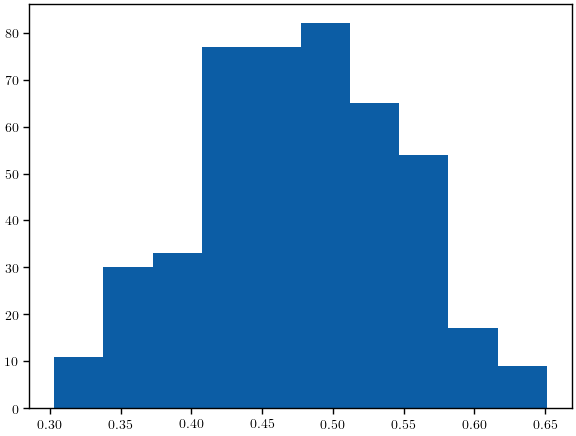

In [16]:
plt.hist([lens.f_dm for lens in lens_list])
plt.show()

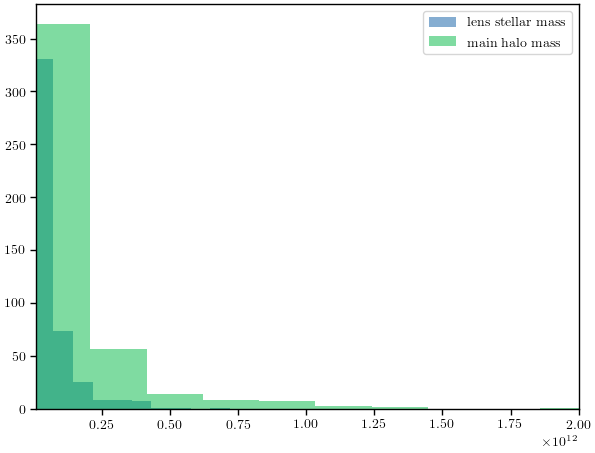

In [26]:
plt.hist([lens.lens_stellar_mass for lens in lens_list], label='lens stellar mass', alpha=0.5)
plt.hist([lens.main_halo_mass for lens in lens_list], label='main halo mass', alpha=0.5)
plt.legend()
plt.xlim(0.1e11, 2e12)
plt.show()